# Generation of an AMBER-compatible templates
This notebook shows how to use the API of `peleffy` to generate an Impact template that supports the AMBER force field implementation we have in PELE.

### `peleffy` requires the Schrodinger Toolkit to use the OPLS2005 parameters
To indicate the path to the Schrodinger's installation `peleffy` needs the following environment variable to be set.

In [1]:
import os
os.environ['SCHRODINGER'] = '/opt/schrodinger/suites2021-1/'

### Load `peleffy`'s molecule representation with a PDB file of anthracene

In [2]:
from peleffy.topology import Molecule

 - Initializing molecule from a SMILES tag
   - Loading molecule from RDKit
   - Setting molecule name to 'c1ccc2cc3ccccc3cc2c1'
   - Representing molecule with the Open Force Field Toolkit
 - Generating rotamer library
   - Core set to the center of the molecule


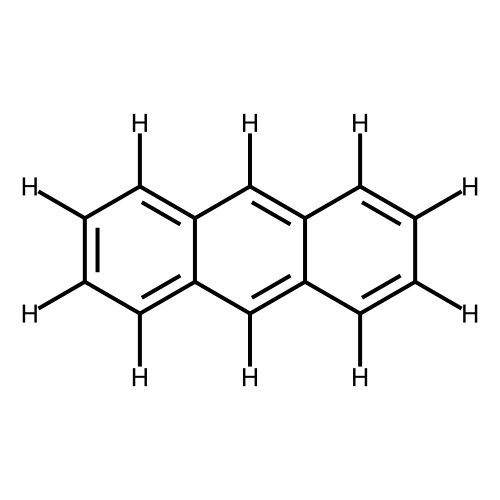

In [3]:
anthracene = Molecule(smiles='c1ccc2cc3ccccc3cc2c1', hydrogens_are_explicit=False)
display(anthracene)

### Parameterize with `ffld_server`, and generate the Impact template
Please, note that to save the Impact template in the required format for PELE's AMBER, we need to set `for_amber` to `True` when initializing the `Impact` class.

In [4]:
from peleffy.forcefield import OPLS2005ForceField
from peleffy.topology import Topology
from peleffy.template import Impact

In [5]:
opls_ff = OPLS2005ForceField()
parameters = opls_ff.parameterize(anthracene)

In [6]:
topology = Topology(anthracene, parameters)

In [7]:
impact = Impact(topology, for_amber=True)
impact.to_file('antz')